___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
Advertisement Click through prediction

In this project I will be working with an advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. I will try to create a model that will predict whether or not they will click on an ad based off the features of that user.


## Import Libraries


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [8]:
commercial_data = pd.read_csv('advertising.csv')

## Exploratory Data Analysis

Let's use seaborn to explore the data!

In [10]:
commercial_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


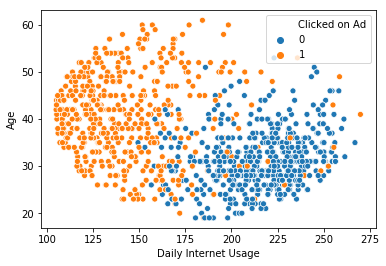

In [17]:
sns.scatterplot(x='Daily Internet Usage', y='Age',hue='Clicked on Ad', data=commercial_data)

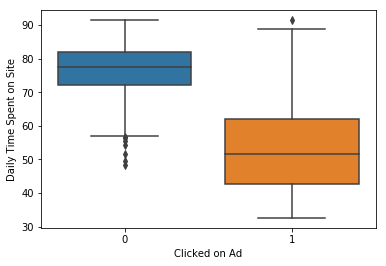

In [21]:
sns.boxplot(y='Daily Time Spent on Site', x='Clicked on Ad', data=commercial_data)

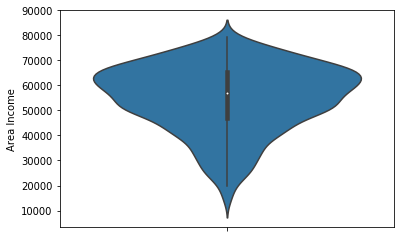

In [33]:
sns.violinplot(x='', y='Area Income', hue='Clicked on Ad', split=True, data=commercial_data)

In [56]:
from datetime import datetime


commercial_data['Timestamp'] = commercial_data['Timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

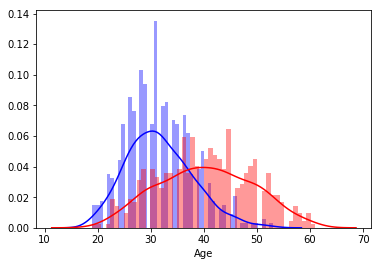

In [25]:
sns.distplot(commercial_data[commercial_data['Clicked on Ad'] == 0]['Age'], kde=True, bins=50, color='blue' )
sns.distplot(commercial_data[commercial_data['Clicked on Ad'] == 1]['Age'], kde=True, bins=50, color='red' )

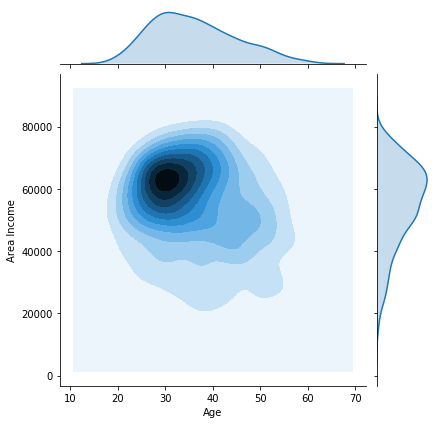

In [14]:
sns.jointplot('Age','Area Income', data=commercial_data, kind='kde')

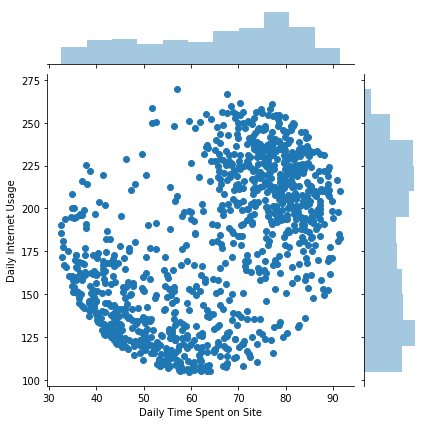

In [18]:
sns.jointplot('Daily Time Spent on Site', 'Daily Internet Usage', data=commercial_data, kind='scatter')

LinAlgError: singular matrix

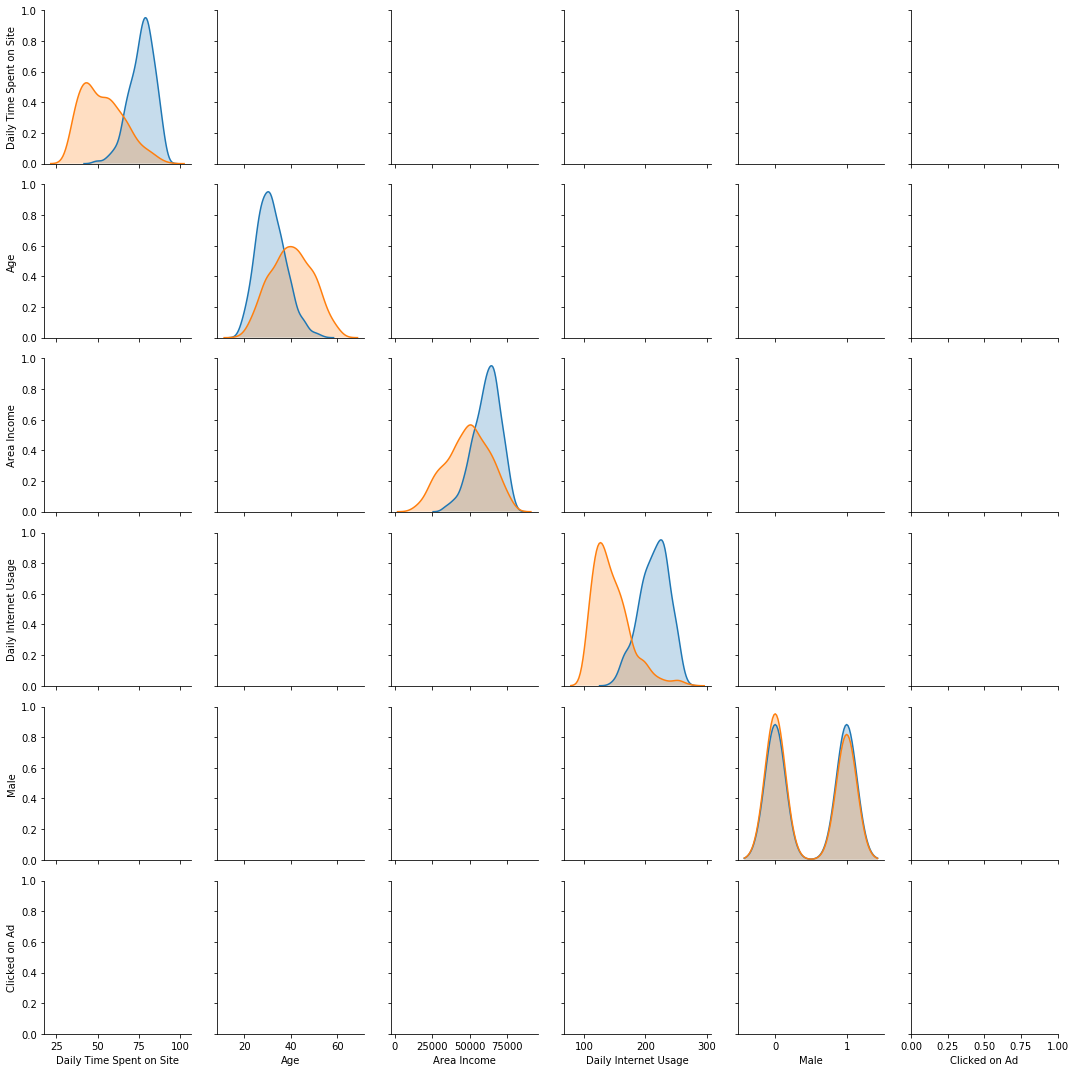

In [57]:
sns.pairplot(data=commercial_data, hue='Clicked on Ad')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

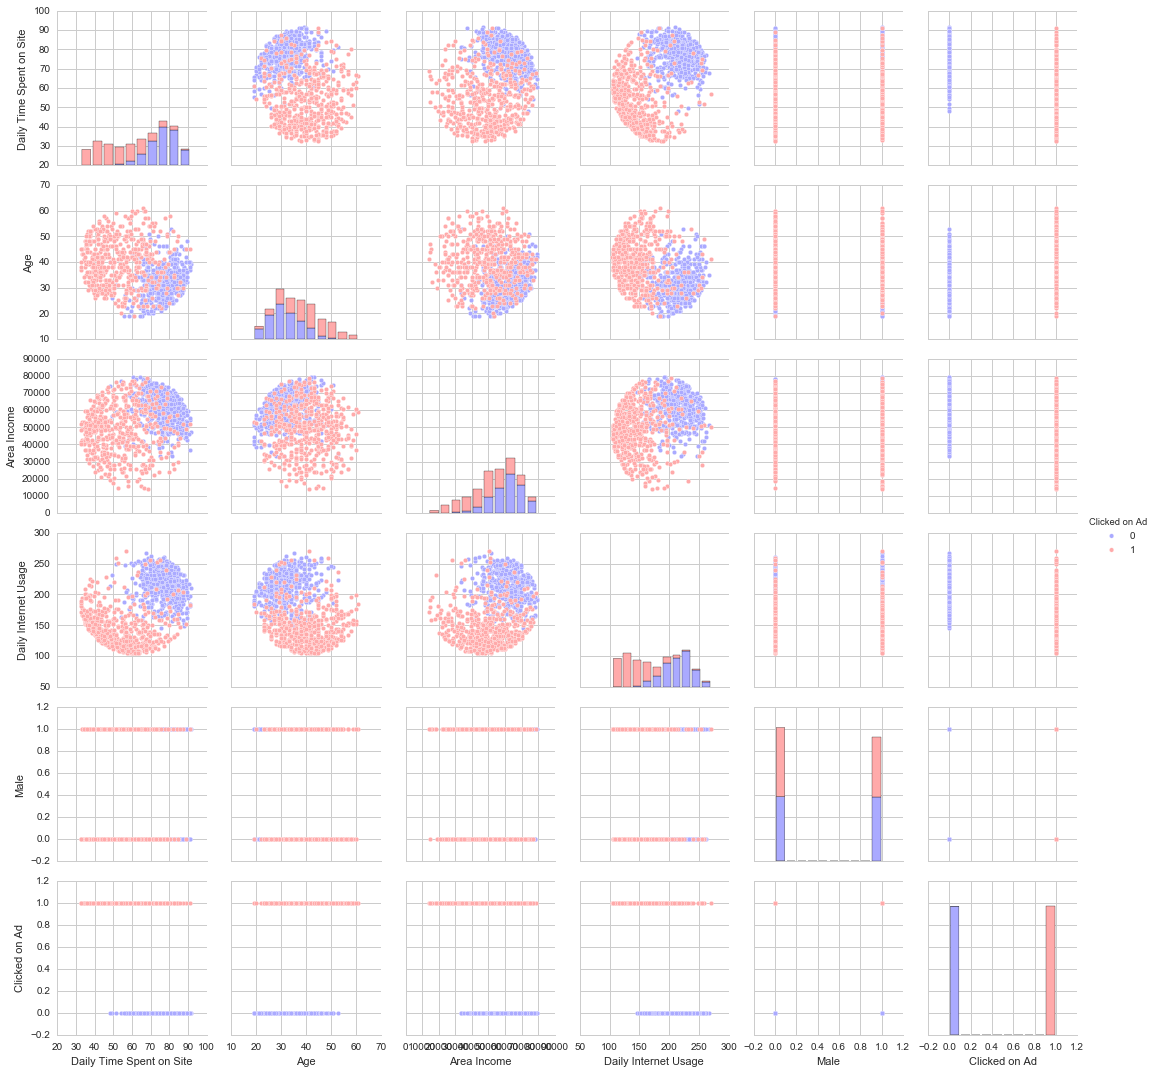

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [62]:
from sklearn.model_selection import train_test_split
X = commercial_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
y = commercial_data['Clicked on Ad']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

In [64]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

c:\users\pradhyum\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
predicted_y = log_model.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
classification_report(y_test, predicted_y)


'              precision    recall  f1-score   support\n\n           0       0.90      0.95      0.92       134\n           1       0.94      0.88      0.91       116\n\n   micro avg       0.92      0.92      0.92       250\n   macro avg       0.92      0.91      0.92       250\nweighted avg       0.92      0.92      0.92       250\n'

** Train and fit a logistic regression model on the training set.**

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

** Create a classification report for the model.**

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



## Great Job!